In [13]:
%matplotlib inline
import pandas as pd
import numpy as np
import pandas_profiling as pf
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [2]:
#EDA
df = pd.read_csv('./data/amazon_unlocked_mobile.csv')
pf.ProfileReport(df)

Number of variables,6
Number of observations,413840
Total Missing (%),3.4%
Total size in memory,18.9 MiB
Average record size in memory,48.0 B
Numeric,3
Categorical,3
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [3]:
df.dropna(inplace=True)
df = df[df['rating'] != 3]
df.sample(10)

,product_name,brand_name,price,rating,reviews,review_votes
296508,"Posh Mobile Memo S580a - 5.8"" Display, 4G H+ G...",Posh Mobile,179.99,4,This phone is great I only found one thing wro...,0.0
266419,Nokia E72 Unlocked Phone Featuring GPS with Vo...,Nokia,99.99,5,I had an e-71 and (after substantial firmware ...,4.0
37068,Apple iPhone 5c a1532 8GB Blue Smartphone for ...,Apple,94.00,5,The cellphone arrived in excellent conditions....,0.0
358386,Samsung Galaxy S5 SM-G900H Factory Unlocked Ce...,Samsung,339.99,5,Excelent,0.0
269210,Nokia Lumia 635 8GB Unlocked GSM 4G LTE Window...,Nokia,99.95,5,Perfect,0.0
344746,Samsung Galaxy S4 Mini GT-i9195i Unlocked Cell...,Samsung,276.37,5,Excelente,1.0
46863,Apple iPhone 5s 64GB (Gold) - Verizon Wireless,Apple,239.95,5,It met all the criteria,1.0
213771,LG enV2 VX-9100 Black QWERTY Cell Phone for Ve...,LG,78.00,5,"what can i say? this is a great little phone, ...",0.0
294070,POSH MOBILE EQUAL PRO 4G LTE ANDROID GSM UNLOC...,Posh Mobile,114.99,5,This is one big phone. Not for those with smal...,2.0
233819,LG Optimus G Pro E980 32GB Unlocked GSM 4G LTE...,LG,105.00,5,"Fast Shipping, Fantastic Seller, Item was bett...",0.0


In [4]:
df['Positivly Rated']  = np.where(df['rating'] > 3,1,0)
df.head()

,product_name,brand_name,price,rating,reviews,review_votes,Positivly Rated
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,1
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,1
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,1
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,1
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,1


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


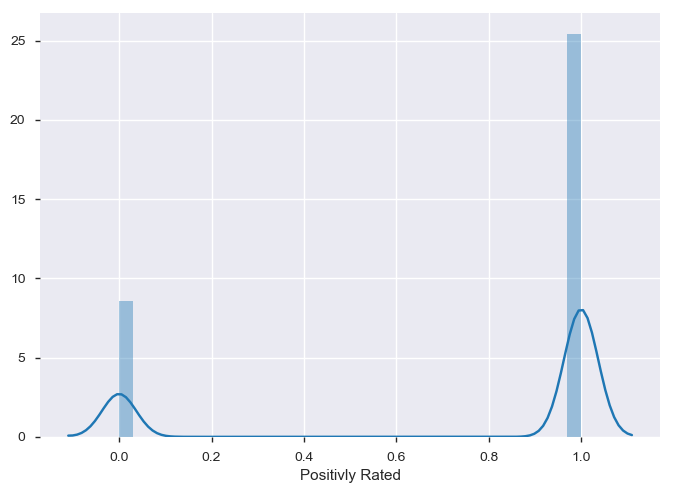

In [5]:
sns.distplot(df['Positivly Rated']) # Most rating are positive 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df['reviews'],df['Positivly Rated']
                                                    ,random_state=420)
print('First instance of X_train: {} \n',X_train.iloc[0])
X_train.shape

First instance of X_train: {} 
 I purchase it for m daughter. She loves it.So far everything works. Amazing battery life. Good phone for this price.


(231207,)

In [7]:
vect = CountVectorizer().fit(X_train)

In [8]:
len(vect.get_feature_names())

53316

In [9]:
X_train_vectorized = vect.transform(X_train)

In [10]:
lr = LogisticRegression(solver='lbfgs',max_iter=10000).fit(X_train_vectorized,y_train)

In [11]:
y_pred = lr.predict(vect.transform(X_test))

print('Roc Score : ',roc_auc_score(y_test,y_pred))

Roc Score :  0.9314212784871172


In [12]:
feature_names = np.array(vect.get_feature_names())
sorted_coeff_index = lr.coef_[0].argsort()

print('Largest Coeff: \n {}'.format(feature_names[sorted_coeff_index   [:10]]))
print('Smallest Coeff: \n {}'.format(feature_names[sorted_coeff_index   [:-11:-1]]))

Largest Coeff: 
 ['mony' 'horribly' 'worst' 'worthless' 'junk' 'false' 'superthin'
 'novelty' 'messing' 'unsatisfied']
Smallest Coeff: 
 ['excelent' 'excelente' '4eeeks' 'excellent' 'loves' 'loving' 'efficient'
 'exelente' 'ofamanda' 'lumina']


### TF - IDF 

In [16]:
# setting minimun doccument frequency 5 , we can get terms only which appears in doc min 5 times
vect = TfidfVectorizer(min_df = 5).fit(X_train)
len(vect.get_feature_names())

18017

In [18]:
X_train_vectorized = vect.transform(X_train)
model = LogisticRegression(solver='lbfgs',max_iter=10000).fit(X_train_vectorized,y_train)
y_pred = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test,y_pred))

AUC:  0.9271746894396967


In [28]:
feature_names = np.array(vect.get_feature_names())
sorted_tfidf_index = X_train_vectorized.max(0).toarray()[0].argsort()

print('Smallest tfidf:\n{}\n'.format(feature_names[sorted_tfidf_index[:10]]))
print('Largest tfidf: \n{}'.format(feature_names[sorted_tfidf_index[:-11:-1]]))

Smallest tfidf:
['storageso' 'commenter' 'warmness' 'pthalo' 'aggregration' '625nits'
 'abreast' 'ionized' 'resins' 'liquidating']

Largest tfidf: 
['di' 'bjvjjbkvjvj' 'contenta' 'magnific' 'exselente' 'too' 'magnificent'
 'magnifico' 'malfunction' 'malfunctioning']


In [30]:
sorted_coeff_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coeff_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coeff_index[-11:-1]]))

Smallest Coefs:
['not' 'worst' 'useless' 'terrible' 'return' 'disappointed' 'waste' 'poor'
 'horrible' 'returning']

Largest Coefs: 
['far' 'easy' 'loves' 'awesome' 'perfectly' 'best' 'perfect' 'amazing'
 'excellent' 'love']


In [34]:
print(model.predict(vect.transform(['not an issue, phone is working',
                                    'an issue, phone is not working'])))
#model predicted both reviews as negative 

[0 0]


### N - grams

In [35]:
vect = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)
len(vect.get_feature_names())
# obvious increase in features as n grams are considered

200537

In [46]:
X_train_vectorized = vect.transform(X_train)
model = LogisticRegression(solver='lbfgs',max_iter=20000).fit(X_train_vectorized,y_train)
y_pred = model.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, y_pred))

AUC:  0.9674698772545934


In [51]:
features_names = np.array(vect.get_feature_names())
sorted_coef_index = model.coef_[0].argsort()
print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

IndexError: index 112276 is out of bounds for axis 1 with size 18017

In [52]:
print(model.predict(vect.transform(['not an issue, phone is working',
                                    'an issue, phone is not working'])))

[1 0]
